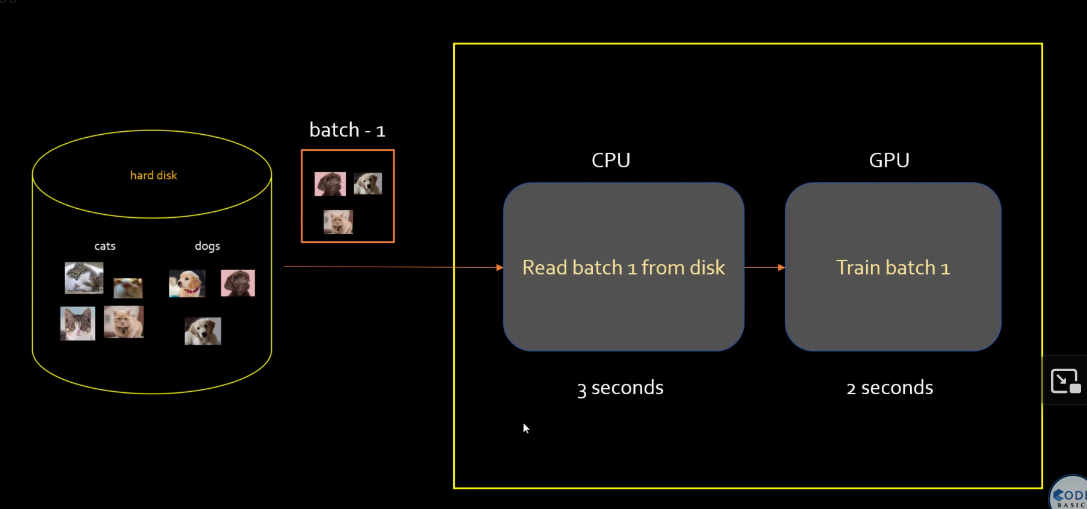

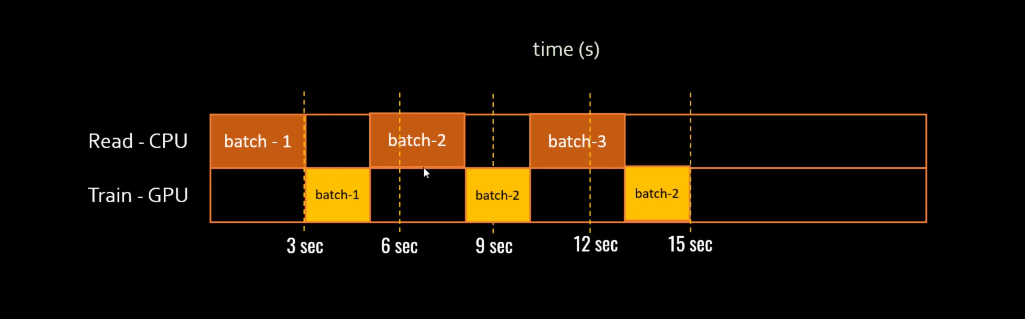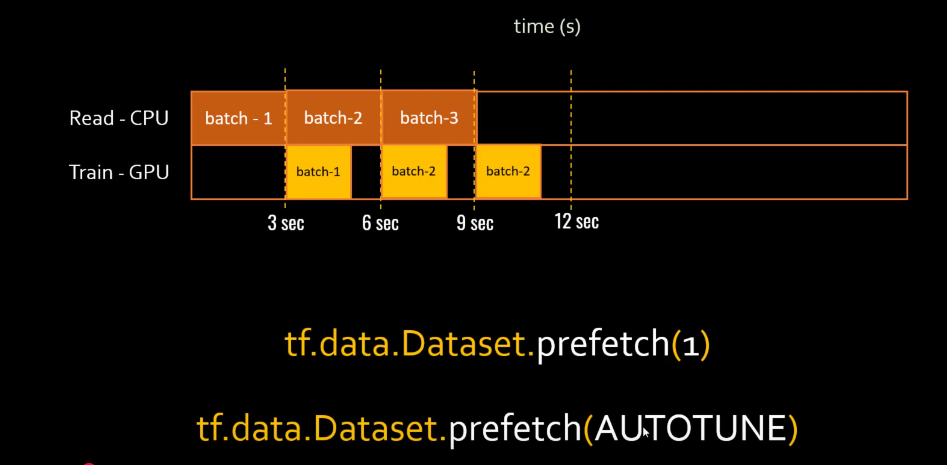

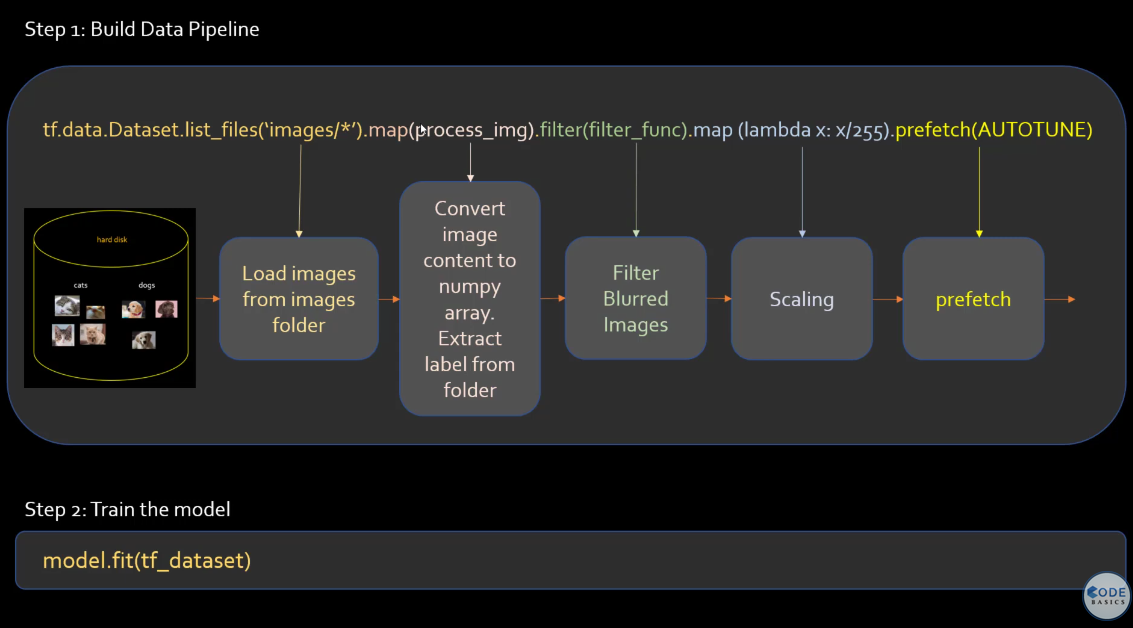

There's redundancy in these. so we use cache dataset

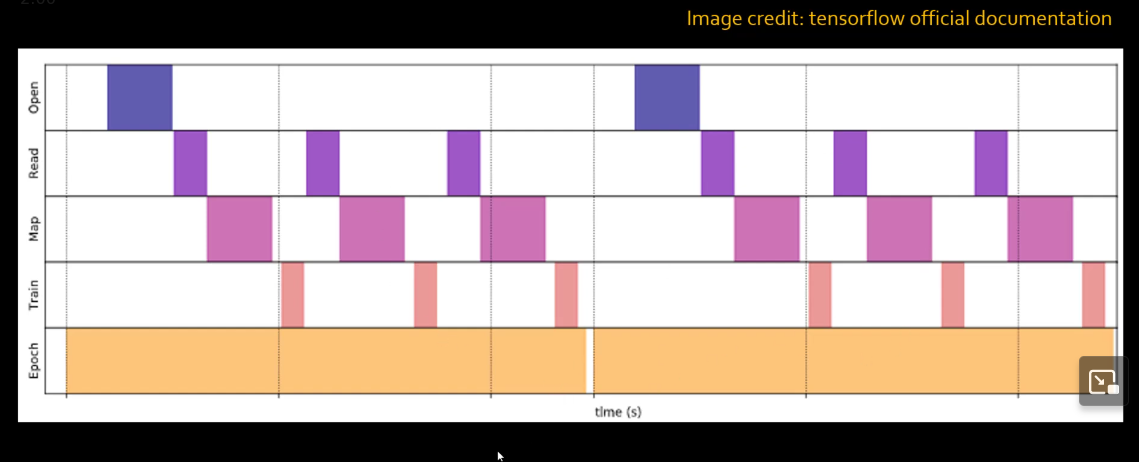

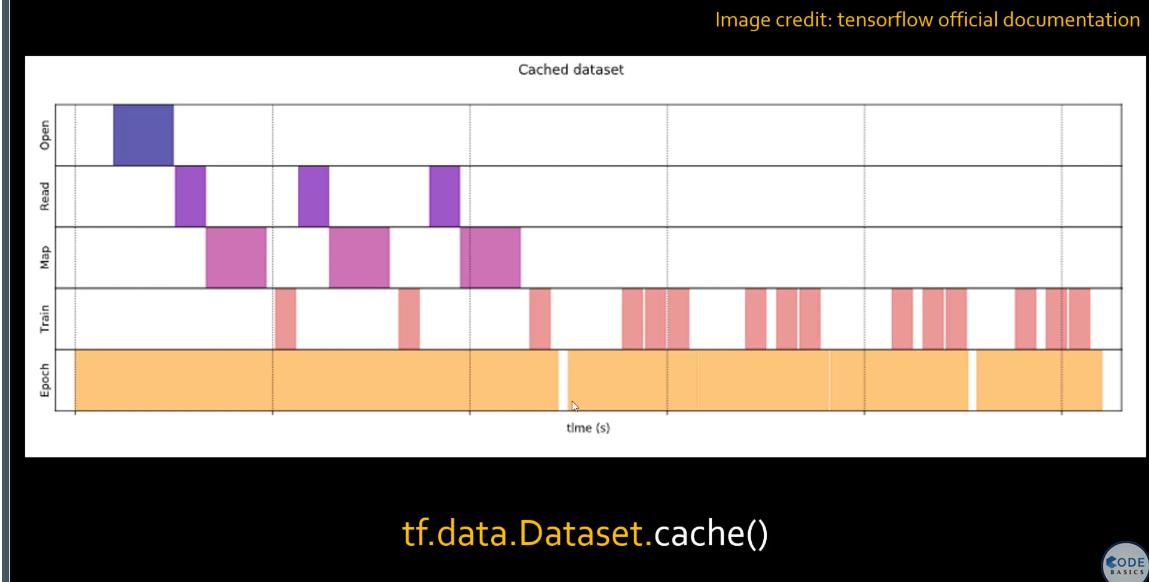

In [1]:
import tensorflow as tf
import time

In [13]:
class FileDataset(tf.data.Dataset):
  def read_files_in_batches(num_samples):
    #open file
    time.sleep(0.03)
    for sample_idx in range(num_samples):
      time.sleep(0.015)
      yield (sample_idx,)

  def __new__(cls, num_samples=3):
    return tf.data.Dataset.from_generator(
        cls.read_files_in_batches,
        output_signature = tf.TensorSpec(shape = (1,), dtype = tf.int64),
        args = (num_samples,)
    )

In [14]:
def benchmark(dataset, num_epochs=2):
  for epoch_num in range(num_epochs):
    for sample in dataset:
      time.sleep(0.01)

In [15]:
%%timeit
benchmark(FileDataset())

262 ms ± 7.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
benchmark(FileDataset().prefetch(1))

262 ms ± 5.25 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
benchmark(FileDataset().prefetch(tf.data.AUTOTUNE))

280 ms ± 41.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# **CACHE API**

In [19]:
dataset = tf.data.Dataset.range(5)
for d in dataset:
  print(d.numpy())

0
1
2
3
4


In [20]:
dataset = dataset.map(lambda x: x**2)
for d in dataset:
  print(d.numpy())

0
1
4
9
16


In [21]:
dataset = dataset.cache()
list(dataset.as_numpy_iterator())

[np.int64(0), np.int64(1), np.int64(4), np.int64(9), np.int64(16)]

In [22]:
def mapped_function(s):
  tf.py_function(lambda: time.sleep(0.03), [], ())
  return s

In [23]:
%%timeit -n1 -r1
benchmark(FileDataset().map(mapped_function), 5)

1.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**below code uses the map funciton from the cache itself during the next epochs which saves time.**

In [24]:
%%timeit -n1 -r1
benchmark(FileDataset().map(mapped_function).cache(), 5)

409 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
